# 데이터 전처리

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [40]:
# 개별 열데이터를 조합하여 행데이터로 변환
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [41]:
# 원소 1을 5개 넘파이 배열로 생성, ones([생성개수])
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [42]:
# sklearn <= 사이킷런, 머신러닝, 데이터분석관련 라이브러리 제공
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [11]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [12]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [13]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
# stratify=[label 데이터] : 훈련셋, 테스트셋에 분류클래스 데이터가 균등하게 배분
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [15]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

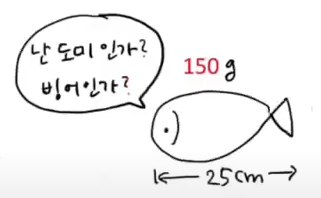

### 나는 빙어로 예측 되는 것이 맞는 것인가?

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 현재 빙어로 예측됨

In [17]:
print(kn.predict([[25, 150]]))

[0.]


In [18]:
import matplotlib.pyplot as plt

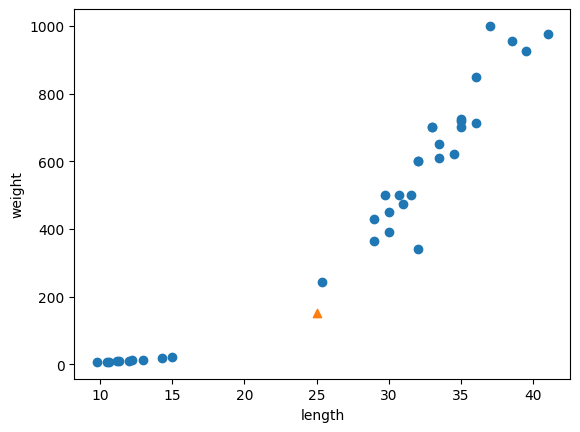

In [19]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
# kneighbors([샘플 데이터])
# 해당 셈플데이터의 인접한 이웃의 인덱스와 거리를 반환함(Default값 5)
distances, indexes = kn.kneighbors([[25, 150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

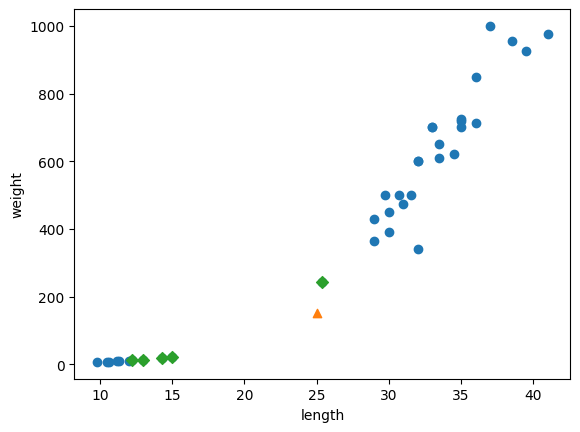

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
# 검증하고자하는 데이터(수상한 도미)는 삼각형으로
plt.scatter(25, 150, marker='^')

# 수상한 도미의 인접한 5개 이웃은 다이아몬드로 표시
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [23]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [24]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 위 시각화로 왜 수상한 도미가 빙어로 문제가 무엇이라고 도출할 수 있나?

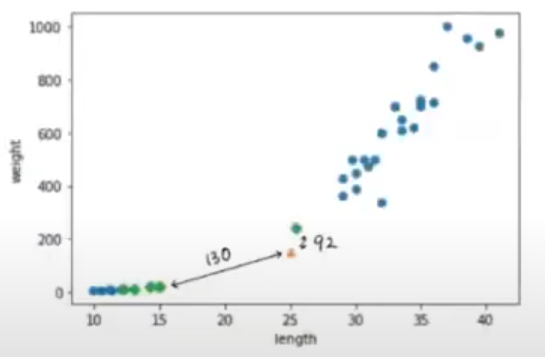

## 기준을 맞춰라

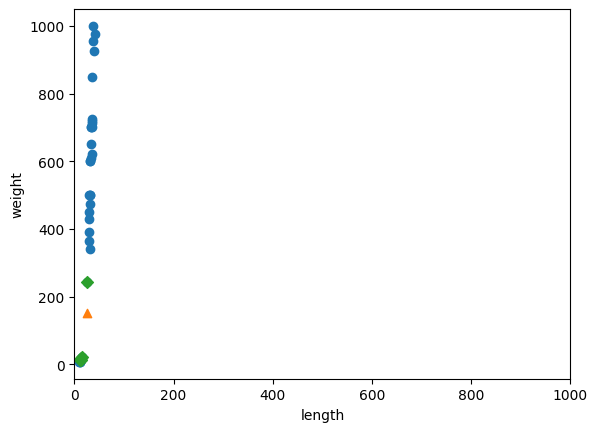

In [25]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
# x축도 y축의 값에 맞게 지정
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 무엇을 추론할 수 있나?

## 데이터 표준화
* 데이터 표준화/정규화 (Data Strandardization)
* (특성 - 평균 ) / 표준편차 => Z 점수

In [26]:
# 길이보다 무게가 생성을 구분 짓는데 중요한 역할을 한다.

In [27]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [28]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [43]:
# 넘파이의 브로드캐스팅기능으로 전체 train_input 열의 데이터값이 각각 업데이트된다.
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

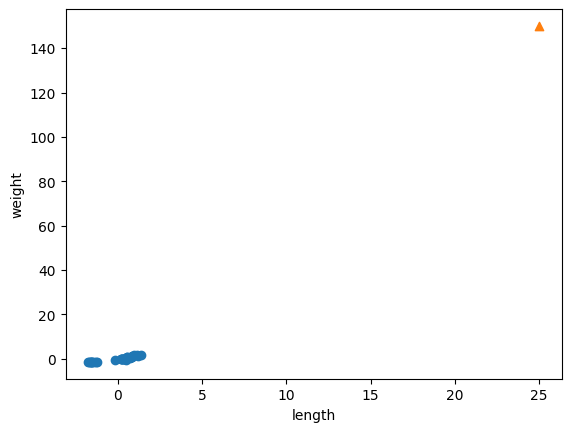

In [30]:
# 수상한 도미 값도 정규화를 하지 않으면 스케일이 맞지 않다.
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
# 수상한 도미값도 데이터 표준화
new = ([25, 150] - mean) / std

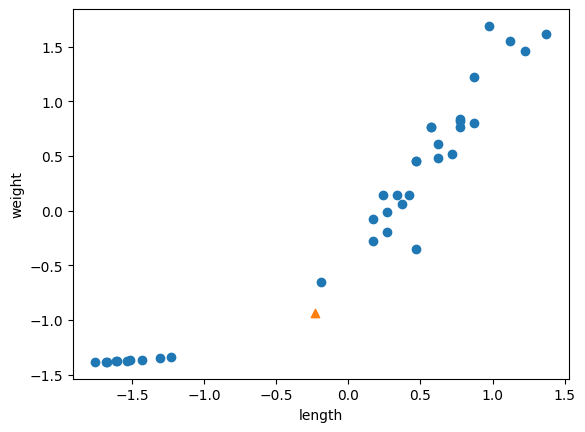

In [32]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [34]:
test_scaled = (test_input - mean) / std

In [35]:
kn.score(test_scaled, test_target)

1.0

### 데이터표준화 진행후 수상한 도미값 재 예측

In [36]:
# 이제는 도미로 예측
print(kn.predict([new]))

[1.]


In [37]:
distances, indexes = kn.kneighbors([new])

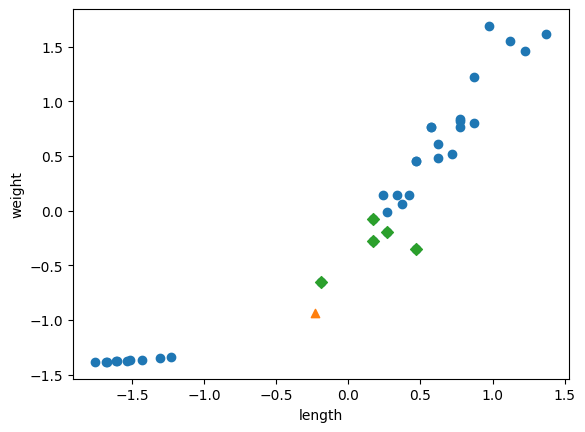

In [38]:
# 표준화후 인접한 5개의 값도 모두 도미쪽으로 반영
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()